# Installing Neccessary Dependencies

In [244]:
!pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [245]:
import pandas as pd                  #python package for data analysis
import numpy as np                   #python package for handling arrays
import seaborn as sns                #python package for data visualization
import matplotlib.pyplot as plt      #python package for data visualization
import neattext as nt                #python package for text cleaning
from textblob import TextBlob    #package for sentiment analysis of short sentences
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report, plot_confusion_matrix


### Reading the PRIMARY Data Files

In [246]:
df0=pd.read_csv('nyt_topic_0.csv')
df1=pd.read_csv('nyt_topic_1.csv')
df2=pd.read_csv('nyt_topic_2.csv')

### Reading the SECONDARY Data Files

In [247]:
df3=pd.read_csv('twitter_topic_0.csv')
df4=pd.read_csv('twitter_topic_1.csv')
df5=pd.read_csv('twitter_topic_2.csv')
df6=pd.read_csv('twitter_topic_3.csv')
df7=pd.read_csv('twitter_topic_4.csv')

### Joining Both PRIMARY and SECONDARY Files to Single Files

In [248]:
sop_df_prmry=pd.concat([df0,df1,df2],axis=0)
sop_df_scndry=pd.concat([df3,df4,df5,df6,df7],axis=0)

In [249]:
df=sop_df_prmry.copy()

### Problem Type

Target variable is categorical so it is a classificatin problem

### Checking Percentage of Missing Values

In [250]:
sop_df_prmry.isnull().sum()/sop_df_prmry.shape[0]

text     0.000000
label    0.158672
dtype: float64

In [251]:
sop_df_scndry.isnull().sum()/sop_df_scndry.shape[0]

text     0.000000
label    0.073333
dtype: float64

### Remove Text with Missing Values 

In [252]:
sop_df_prmry= sop_df_prmry.dropna(axis=0) # My code
sop_df_prmry= sop_df_prmry.dropna().reset_index(drop=True)

In [253]:
sop_df_scndry= sop_df_scndry.dropna(axis=0)# My code
sop_df_scndry= sop_df_scndry.dropna().reset_index(drop=True)

### **Summary Statistics**

### Data Shape

In [256]:
#primary dataset
sop_df_prmry.shape

(684, 2)

In [257]:
#secondary dataset
sop_df_scndry.shape

(1390, 2)

### Data Summary

In [258]:
#primary dataset
sop_df_prmry.describe()

,text,label
count,684,684
unique,449,3
top,I have not been out to a restaurant since the ...,vaccination
freq,3,451


In [259]:
#secondary dataset
sop_df_scndry.describe()

,text,label
count,1390,1390
unique,1386,3
top,STUDIES SHOW MORPHINE MILLIGRAM EQUIVALENT (MM...,vaccination
freq,3,859


### Text Cleaning

In [260]:
def text_cleaning(text):
    text=nt.fix_contractions(text)
    text=nt.remove_puncts(text)
    text=nt.remove_bad_quotes(text)
    text=nt.remove_emojis(text)
    text=nt.remove_numbers(text)
    text=nt.remove_multiple_spaces(text)
    text=nt.remove_non_ascii(text)
    return text

In [261]:
sop_df_prmry['cleaned_text']=sop_df_prmry['text'].apply(lambda x:text_cleaning(x))
sop_df_scndry['cleaned_text']=sop_df_scndry['text'].apply(lambda x:text_cleaning(x))

# Binary Classification

We Picked up **vaccination** as our target lable, so put **True** where **vaccination** lable is present and put **false** where the vaccination label is not present in the target feature

In [262]:
sop_df_prmry['vaccination']=sop_df_prmry['label']=='vaccination'
sop_df_scndry['vaccination']=sop_df_scndry['label']=='vaccination'

### Text Vectorization

In [263]:
from sklearn.model_selection import train_test_split

In [264]:
X=sop_df_prmry['cleaned_text']
y=sop_df_prmry['vaccination']

### Splitting PRIMARY Data into 70% Training and 30% Testing Data

In [265]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123, stratify=y)

In [266]:
#converting the PRIMARY data text into vector using bag of words
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train = count_vect.fit_transform(X_train)
X_test = count_vect.transform(X_test)

In [267]:
X_secondary=sop_df_scndry['cleaned_text']

In [268]:
#Converting SECONDARY data text into vectors
X_secondary = count_vect.transform(X_secondary)

In [269]:
y_secondary=sop_df_scndry['vaccination']

### Data Balancing

Our target feature is not evenly distributed so we apply over sampling on the data in order to balance the target feature

In [270]:
from imblearn.over_sampling import SMOTE   #package foe balancing the data
sampler = SMOTE()
X_train, y_train = sampler.fit_resample(X_train, y_train)  #balancing trainig and testing data

In [271]:
sampler = SMOTE()
X_secondary, y_secondary = sampler.fit_resample(X_secondary, y_secondary)  #balancing trainig and testing data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


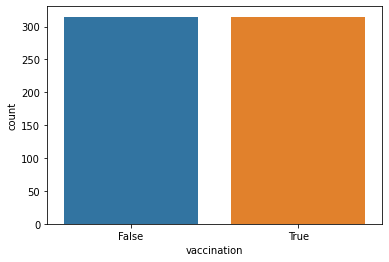

In [272]:
#Balanced target feature
sns.countplot(y_train)

# **3 - Model Training and Testing**

Training of Multinomial Naive Bayes Classifier

In [273]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

Making Prediction on PRIMARY Test Data

In [274]:
clf.predict(X_test)

array([False,  True,  True, False,  True, False,  True,  True,  True,
       False,  True, False,  True,  True,  True, False,  True,  True,
        True,  True, False, False,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False, False, False,  True, False, False, False,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True,  True, False, False, False,  True,
       False,  True, False,  True, False,  True,  True, False, False,
        True,  True, False,  True,  True,  True,  True,  True, False,
       False,  True, False,  True,  True, False,  True,  True, False,
        True, False,  True,  True, False, False,  True,  True,  True,
        True, False, False, False,  True,  True,  True,  True,  True,
        True, False,  True, False, False,  True, False, False, False,
        True, False,

### Model Training Accuracy on PRIMARY Test Data

In [275]:
y_pred=clf.predict(X_test)

In [276]:
accuracy_score(y_test,y_pred)

0.7912621359223301

### Model Accuracy on SECONDARY Data

In [277]:
y_pred=clf.predict(X_secondary)

In [278]:
accuracy_score(y_secondary,y_pred)

0.6757857974388825

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


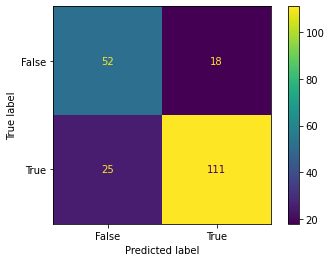

In [279]:
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


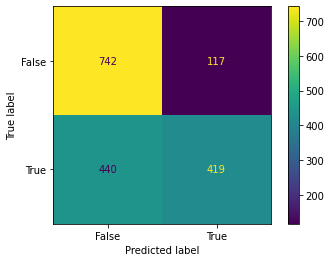

In [280]:
plot_confusion_matrix(clf, X_secondary, y_secondary)
plt.show()

# Feature Engineering

We added three attributes of the text feature that are Sentiment of the text, emotion of the text,and group of the text it belongs to(Kmeans Clustering).

In [281]:
sop_df_scndry['text']=sop_df_scndry['text'].apply(lambda x:nt.remove_urls(x))

### Adding Sentiment Feature in the dataset

In [282]:
#Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [283]:
sop_df_prmry['polarity']=sop_df_prmry['text'].apply(lambda x:getPolarity(x))
sop_df_scndry['polarity']=sop_df_scndry['text'].apply(lambda x:getPolarity(x))

In [284]:
#Assinig 1,0 label to sentiment based on its ploarity: 1 for positive and 0 for negative sentiment
def getSentimentTag(score):
    if score < 0:
        return 0
    elif score >=0:
        return 1

In [285]:
sop_df_prmry['sentiment_tag']=sop_df_prmry['polarity'].apply(lambda x:getSentimentTag(x))
sop_df_scndry['sentiment_tag']=sop_df_scndry['polarity'].apply(lambda x:getSentimentTag(x))

### Adding Emotion Feature in the dataset

In [286]:
#installing transformers model to find emotion in the text
! pip install transformers -q
from transformers import pipeline
emotion = pipeline('sentiment-analysis', model='arpanghoshal/EmoRoBERTa')

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [287]:
sop_df_prmry['Emotions']=sop_df_prmry['text'].apply(emotion)
sop_df_scndry['Emotions']=sop_df_scndry['text'].apply(emotion)

In [288]:
def extract_em(em_dict):
  return em_dict[0]['label'] 
  # print(em_dict[0]['label'])

In [289]:
sop_df_prmry['Emotions_Label']=sop_df_prmry['Emotions'].apply(lambda x:extract_em(x))
sop_df_scndry['Emotions_Label']=sop_df_scndry['Emotions'].apply(lambda x:extract_em(x))

In [290]:
neg_feelings=['disapproval','confusion','annoyance','sadness','disappointment','anger','fear','nervousness','grief'
'embarrassment','remorse']

In [291]:
#assingning 1,0 label to emotions: 1 for positive feelings and 0 for negative feelings
def emotion_label_to_number(emotion):
    if emotion in neg_feelings:
        return 0
    else:
        return 1

In [292]:
sop_df_prmry['Emotion_jf']=sop_df_prmry['Emotions_Label'].apply(lambda x:emotion_label_to_number(x))
sop_df_scndry['Emotion_jf']=sop_df_scndry['Emotions_Label'].apply(lambda x:emotion_label_to_number(x))

In [293]:
sop_df_prmry

,text,label,cleaned_text,vaccination,polarity,sentiment_tag,Emotions,Emotions_Label,Emotion_jf
0,Insist on vaccinations or make them stay home....,vaccination,insist on vaccinations or make them stay home ...,True,0.500000,1,"[{'label': 'caring', 'score': 0.56821352243423...",caring,1
1,If employers can make a drug test mandatory as...,vaccination,if employers can make a drug test mandatory as...,True,0.000000,1,"[{'label': 'neutral', 'score': 0.9972274899482...",neutral,1
2,Dozens to hundreds of people crowding together...,masking and distancing,dozens to hundreds of people crowding together...,False,-0.666667,0,"[{'label': 'surprise', 'score': 0.995550274848...",surprise,1
3,If people were bleeding out their eyes and ear...,vaccination,if people were bleeding out their eyes and ear...,True,-0.063333,0,"[{'label': 'neutral', 'score': 0.9403601884841...",neutral,1
4,Require them. Period.\n\nAll the good and dece...,vaccination,require them period all the good and decent pe...,True,0.188889,1,"[{'label': 'approval', 'score': 0.992380499839...",approval,1
...,...,...,...,...,...,...,...,...,...
679,I went out for lunch yesterday with a friend. ...,masking and distancing,i went out for lunch yesterday with a friend i...,False,-0.081399,0,"[{'label': 'anger', 'score': 0.8582791686058044}]",anger,0
680,"Even a year and a half later, I don't understa...",masking and distancing,even a year and a half later i do not understa...,False,0.000661,1,"[{'label': 'gratitude', 'score': 0.97042500972...",gratitude,1
681,Let me get this straight. Vaccinated people ar...,vaccination,let me get this straight vaccinated people are...,True,0.255000,1,"[{'label': 'optimism', 'score': 0.806596636772...",optimism,1
682,I have not suffered from a cold or the flu for...,masking and distancing,i have not suffered from a cold or the flu for...,False,-0.300000,0,"[{'label': 'approval', 'score': 0.989377140998...",approval,1


### Regular expression

I apply regular expression to add third feature in the datasets. For this purpose, I searched for vaccnination words in the texts. If a text has vaccine word I assigned it a value 1 and assigned 0 if a text has not have vaccine word


In [294]:
import re

def feature_function(text):
    # Flags texts that start with three capitalized words
    # (Not a very useful NLP feature for this task!)
    return int(bool(re.search("Vacci\w+|vacci\w+", text)))
    

#new_feature_array = sop_df_prmry.text.apply(feature_function)
sop_df_prmry['reg_exp']=sop_df_prmry['text'].apply(lambda x:feature_function(x))
sop_df_scndry['reg_exp']=sop_df_scndry['text'].apply(lambda x:feature_function(x))


Assigning the values of 1,0 to text according to occurrence of word vaccine in.

# Binary Classification

We Picked up vaccination as our target lable, so put True where vaccination lable is present and put false where the vaccination label is not present in the target feature

In [295]:
sop_df_prmry['vaccination']=sop_df_prmry['label']=='vaccination'
sop_df_scndry['vaccination']=sop_df_scndry['label']=='vaccination'

In [296]:
sop_df_prmry['cleaned_text']=sop_df_prmry['text'].apply(lambda x:text_cleaning(x))
sop_df_scndry['cleaned_text']=sop_df_scndry['text'].apply(lambda x:text_cleaning(x))

In [297]:
sop_df_prmry=sop_df_prmry[['cleaned_text','sentiment_tag','reg_exp','Emotion_jf','vaccination']]
sop_df_scndry=sop_df_scndry[['cleaned_text','sentiment_tag','reg_exp','Emotion_jf','vaccination']]

In [298]:
X=sop_df_prmry.drop(['vaccination'],axis=1)
y=sop_df_prmry['vaccination']

In [299]:
X_secondary=sop_df_scndry.drop(['vaccination'],axis=1)
y_secondary=sop_df_scndry['vaccination']

### Text Vectorization using Bag of Words

In [300]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
text_vect = count_vect.fit_transform(X.cleaned_text)
text_vect_secondary=count_vect.transform(X_secondary.cleaned_text)

In [301]:
numeric_feat = X[["sentiment_tag", "reg_exp", "Emotion_jf"]].values

In [302]:
numeric_feat_sec=X_secondary[["sentiment_tag", "reg_exp", "Emotion_jf"]].values

In [303]:
X = np.hstack([text_vect.toarray(), numeric_feat])

In [304]:
X_secondary=np.hstack([text_vect_secondary.toarray(), numeric_feat_sec])

Splitting PRIMARY Data into 70% Training and 30% Testing Data

In [305]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123, stratify=y)

In [306]:
from imblearn.over_sampling import SMOTE   #package foe balancing the data
sampler = SMOTE()
X_train, y_train = sampler.fit_resample(X_train, y_train)  #balancing trainig and testing data

In [307]:
from imblearn.over_sampling import SMOTE   #package foe balancing the data
sampler = SMOTE()
X_secondary, y_secondary = sampler.fit_resample(X_secondary, y_secondary)  #balancing trainig and testing data

### Model Training

In [308]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

### Model Accuracy on Primary Training Data

In [309]:
clf.score(X_train,y_train)

0.9682539682539683

### Model Accuracy on Primary Test Data

In [310]:
y_pred=clf.predict(X_test)

In [311]:
clf.score(X_test,y_test)

0.8252427184466019

### Model Accuracy on Secondary data

In [312]:
clf.score(X_secondary,y_secondary)

0.8538998835855646